<a href="https://www.kaggle.com/code/mahinafif/project-mid-nlp?scriptVersionId=236172569" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Importing Necessary libraries

In [1]:
import pandas as pd
import string
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize  
from nltk.stem import WordNetLemmatizer 
from wordcloud import WordCloud


# Load Dataset

In [2]:
file_path = '/kaggle/input/brands-and-product-emotions/judge-1377884607_tweet_product_company.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


# Handling Missing Values

In [3]:
data_cleaned = data.dropna(subset=['tweet_text', 'is_there_an_emotion_directed_at_a_brand_or_product'])
data_cleaned = data_cleaned.dropna(subset=['emotion_in_tweet_is_directed_at'])

data_cleaned.isnull().sum() 

tweet_text                                            0
emotion_in_tweet_is_directed_at                       0
is_there_an_emotion_directed_at_a_brand_or_product    0
dtype: int64

# Counting Total Number of Sentiments

In [4]:
sentiment_counts = data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product'].value_counts()
print(sentiment_counts)

is_there_an_emotion_directed_at_a_brand_or_product
Positive emotion                      2672
Negative emotion                       519
No emotion toward brand or product      91
I can't tell                             9
Name: count, dtype: int64


# Text Preprocessing - Lowercasing

In [5]:
def to_lowercase(text):
    return text.lower()

data_cleaned['cleaned_tweet_text'] = data_cleaned['tweet_text'].apply(to_lowercase)

# Text Preprocessing - Removing Punctuation

In [6]:
def remove_punctuation(text):
    return ''.join([char for char in text if char not in string.punctuation])

data_cleaned['cleaned_tweet_text'] = data_cleaned['cleaned_tweet_text'].apply(remove_punctuation)

#  Text Preprocessing - Removing Stopwords

In [7]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])

data_cleaned['cleaned_tweet_text'] = data_cleaned['cleaned_tweet_text'].apply(remove_stopwords)

# Text Preprocessing - Lemmatization

In [8]:
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    tokens = word_tokenize(text)  
    lemmatized = [lemmatizer.lemmatize(token) for token in tokens] 
    return ' '.join(lemmatized)

data_cleaned['cleaned_tweet_text'] = data_cleaned['cleaned_tweet_text'].apply(lemmatize_text)

# Splitting Data into Features and Target

In [9]:
X = data_cleaned['cleaned_tweet_text']
y = data_cleaned['is_there_an_emotion_directed_at_a_brand_or_product']

# Train-Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Text Vectorization: Converting Text to Features

In [11]:
vectorizer = CountVectorizer()
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Model Training - Naive Bayes Classifier

In [12]:
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train_vectorized, y_train)

MultinomialNB()

# Model Evaluation

In [13]:
y_pred = nb_classifier.predict(X_test_vectorized)

accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(accuracy)
print(classification_rep)

0.849772382397572
                                    precision    recall  f1-score   support

                      I can't tell       0.00      0.00      0.00         1
                  Negative emotion       0.79      0.30      0.43       105
No emotion toward brand or product       0.00      0.00      0.00        18
                  Positive emotion       0.85      0.99      0.92       535

                          accuracy                           0.85       659
                         macro avg       0.41      0.32      0.34       659
                      weighted avg       0.82      0.85      0.81       659



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Confusion Matrix

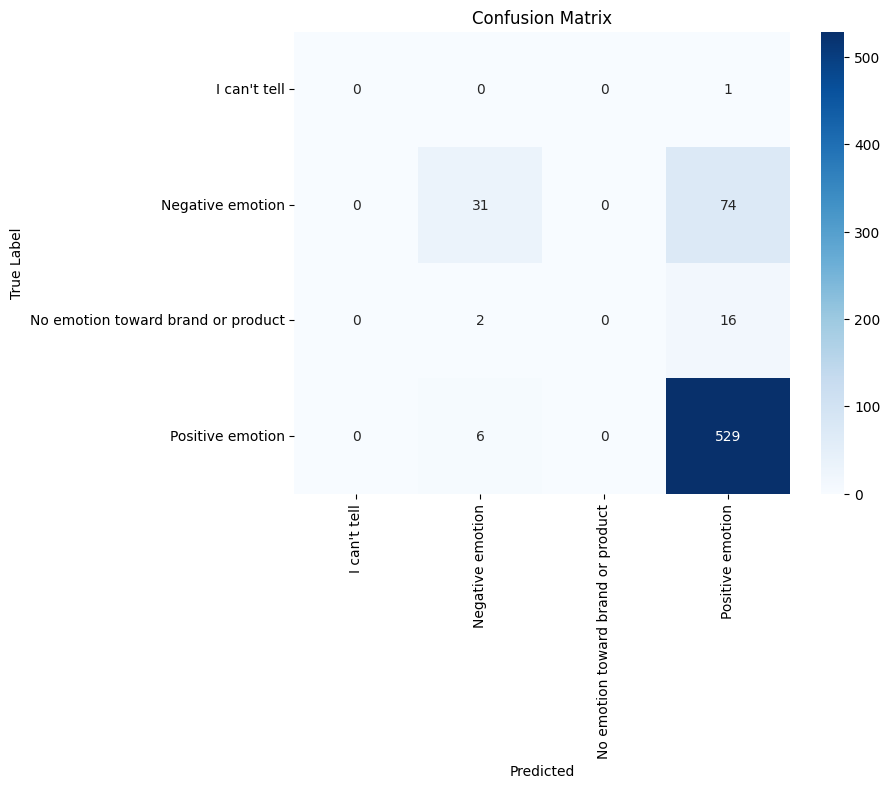

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=nb_classifier.classes_, yticklabels=nb_classifier.classes_)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()